# Gráfico Cuantil-Cuantil o gráfico Q-Q
(Quantile-Quantile plot o Q-Q plot)

Juan Manuel Ahuactzin Larios

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma, uniform, beta, cauchy

a_gamma = 1.8
a_beta = 10
b_beta = 50

m_normal = 100
std_normal = 2

loc_uniform = -2
scale_uniform = 4

normal_percentiles = []
sec_normal_percentiles = []
gamma_percentiles = []
uniform_percentiles = []
beta_percentiles = []
cauchy_percentiles = []

#Create the distributions
my_normal = norm
my_sec_normal = norm(m_normal, std_normal)
my_gamma = gamma(a_gamma)
my_uniform = uniform(loc=loc_uniform, scale=scale_uniform)
my_beta = beta(a_beta, b_beta)
my_cauchy = cauchy

scale = 1000

#Fill data with percentiles
for percentil in range (1, scale):
    normal_percentiles.append(my_normal.ppf(percentil/scale))
    sec_normal_percentiles.append(my_sec_normal.ppf(percentil/scale))
    gamma_percentiles.append(my_gamma.ppf(percentil/scale))
    uniform_percentiles.append(my_uniform.ppf(percentil/scale))
    beta_percentiles.append(my_beta.ppf(percentil/scale))
    cauchy_percentiles.append(my_cauchy.ppf(percentil/scale))

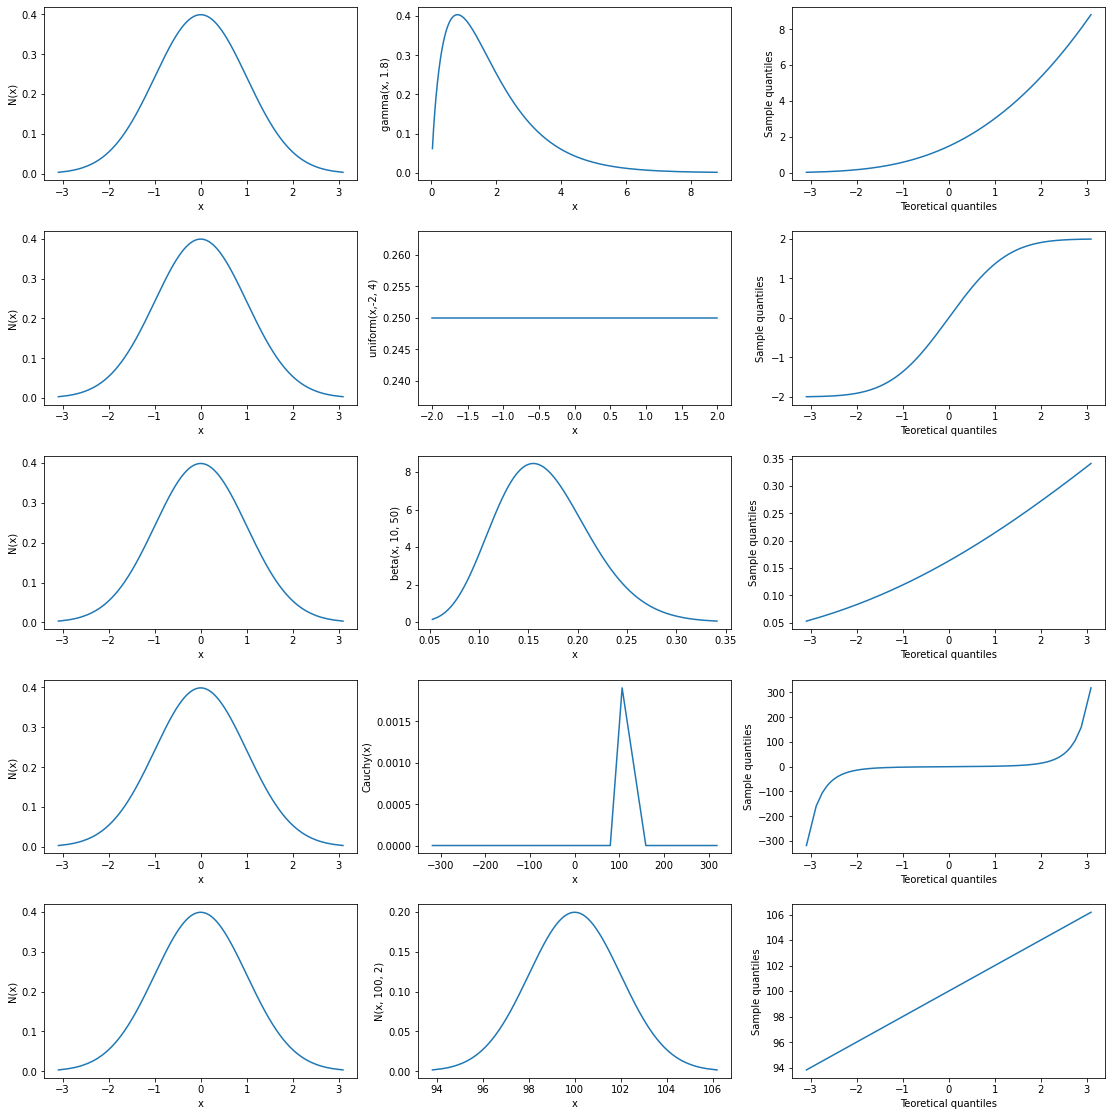

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16, 16))
fig.tight_layout(pad=3.0)

#Line 1: normal vs gamma
axes[0, 0].plot(normal_percentiles, my_normal.pdf(normal_percentiles))
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('N(x)')

axes[0, 1].plot(gamma_percentiles, my_gamma.pdf(gamma_percentiles))
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('gamma(x, '+str(a_gamma)+')')

axes[0, 2].plot(normal_percentiles, gamma_percentiles)
axes[0, 2].set_xlabel('Teoretical quantiles')
axes[0, 2].set_ylabel('Sample quantiles')

#Line 2: normal vs uniform
axes[1, 0].plot(normal_percentiles, my_normal.pdf(normal_percentiles))
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('N(x)')

axes[1, 1].plot(uniform_percentiles, my_uniform.pdf(uniform_percentiles))
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('uniform(x,'+str(loc_uniform)+', '+str(scale_uniform)+')')

axes[1, 2].plot(normal_percentiles, uniform_percentiles)
axes[1, 2].set_xlabel('Teoretical quantiles')
axes[1, 2].set_ylabel('Sample quantiles')

#Line 3: normal vs beta
axes[2, 0].plot(normal_percentiles, my_normal.pdf(normal_percentiles))
axes[2, 0].set_xlabel('x')
axes[2, 0].set_ylabel('N(x)')

axes[2, 1].plot(beta_percentiles, my_beta.pdf(beta_percentiles))
axes[2, 1].set_xlabel('x')
axes[2, 1].set_ylabel('beta(x, '+str(a_beta)+', '+str(b_beta)+')')

axes[2, 2].plot(normal_percentiles, beta_percentiles)
axes[2, 2].set_xlabel('Teoretical quantiles')
axes[2, 2].set_ylabel('Sample quantiles')

#Line 4: normal vs normal
axes[3, 0].plot(normal_percentiles, my_normal.pdf(normal_percentiles))
axes[3, 0].set_xlabel('x')
axes[3, 0].set_ylabel('N(x)')

axes[3, 1].plot(cauchy_percentiles, my_sec_normal.pdf(cauchy_percentiles))
axes[3, 1].set_xlabel('x')
axes[3, 1].set_ylabel('Cauchy(x)')

axes[3, 2].plot(normal_percentiles, cauchy_percentiles)
axes[3, 2].set_xlabel('Teoretical quantiles')
axes[3, 2].set_ylabel('Sample quantiles')

#Line 5: normal vs normal
axes[4, 0].plot(normal_percentiles, my_normal.pdf(normal_percentiles))
axes[4, 0].set_xlabel('x')
axes[4, 0].set_ylabel('N(x)')

axes[4, 1].plot(sec_normal_percentiles, my_sec_normal.pdf(sec_normal_percentiles))
axes[4, 1].set_xlabel('x')
axes[4, 1].set_ylabel('N(x, '+str(m_normal)+', '+str(std_normal)+')')

axes[4, 2].plot(normal_percentiles, sec_normal_percentiles)
axes[4, 2].set_xlabel('Teoretical quantiles')
axes[4, 2].set_ylabel('Sample quantiles')
plt.show()